# Program 8

Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for
clustering using k-Means algorithm. Compare the results of these two algorithms and
comment on the quality of clustering. You can add Java/Python ML library classes/API in the
program.

   Id  sepal_length  sepal_width  petal_length  petal_width      Species
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa


C:\Users\chakr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The accuracy score of K-Mean:  0.3333333333333333
The Confusion matrixof K-Mean:
 [[50  0  0]
 [ 0  0 50]
 [ 0 50  0]]
The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:
  [[50  0  0]
 [ 0  0 50]
 [ 0 50  0]]


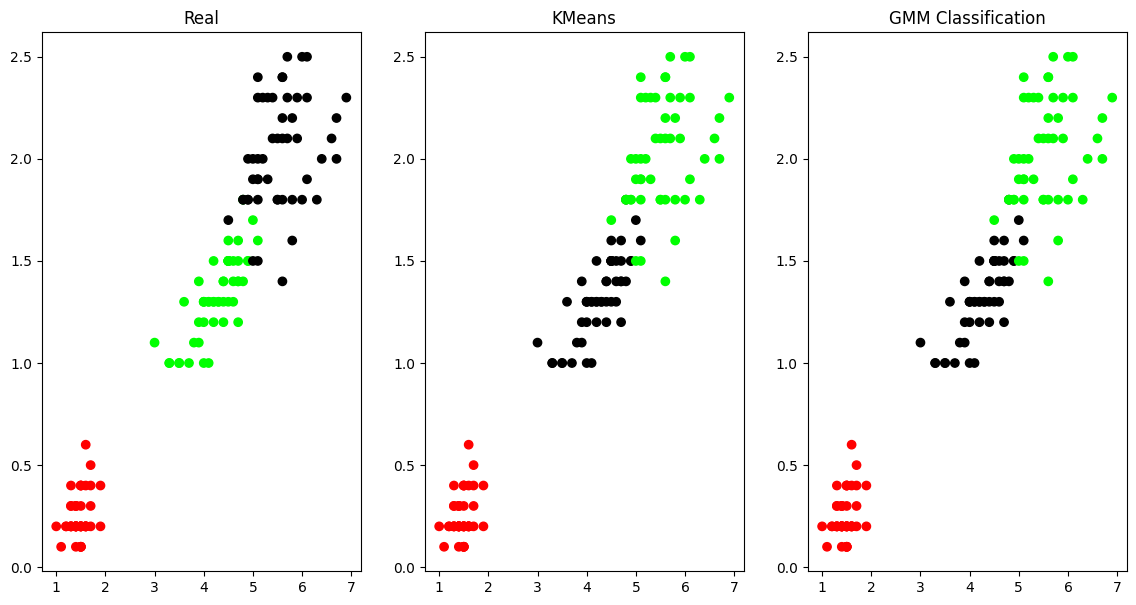

In [1]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("iris.csv")

print(dataset.head())

X = dataset.iloc[:, :-1]

label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2}

y = [label[c] for c in dataset.iloc[:, -1]]

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.petal_length,X.petal_width,c=colormap[y])

# K-PLOT
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.petal_length,X.petal_width,c=colormap[model.labels_])

print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean:\n',metrics.confusion_matrix(y, model.labels_))

# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.petal_length,X.petal_width,c=colormap[y_cluster_gmm])

print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))
